In [1]:
# dependencies import
from common_dependencies import *

IMAGE_SHAPE = (100, 100) #(100,400) #(115,400)
INIT_IMAGE_SIZE = IMAGE_SHAPE[0] * IMAGE_SHAPE[1]

In [2]:
def draw_map(mem_usage_matrix, 
             label = 'Зависимость затрат памяти от размера кропа и шага нарезки', 
             xlabel='Размер кропа', 
             ylabel='Шаг нарезки'):
    
    fig, ax = plt.subplots()

    fig.set_figwidth(12)
    fig.set_figheight(10)
    
    ax.set_xlabel(xlabel, fontsize=15) 
    ax.set_ylabel(ylabel, fontsize=15) 
    ax.set_title(label, fontsize=15) 
    
    map = ax.pcolormesh(mem_usage_matrix)
    cbar = fig.colorbar(map)
    cbar.ax.tick_params(labelsize=15)

    ax.plot([0,mem_usage_matrix.shape[1]],[0,mem_usage_matrix.shape[0]], c='red')
    
    plt.show()

In [3]:
def draw_hist(arr): # , major_x_formatter, minor_x_formatter, major_x_formatter_str, minor_x_formatter_str):
    # Plot the surface
    fig, ax = plt.subplots()
    
    fig.set_figwidth(18)
    fig.set_figheight(6)         
    
    ax.hist(arr, bins=10)
    
    ax.set_xlabel('Диапазон', fontsize=15) 
    ax.set_ylabel('Кол-во кропов', fontsize=15) 
    ax.set_title('Распределение нормализованных величин затрат памяти (от 0 до 1)', fontsize=15) 
    
    #  Устанавливаем интервал основных делений: 
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(major_x_formatter))
    #ax.xaxis.set_minor_locator(ticker.MultipleLocator(minor_x_formatter)) 
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(500)) 
     
    #  Устанавливаем форматирование чисел основных делений: 
    #ax.xaxis.set_major_formatter(ticker.FormatStrFormatter(major_x_formatter_str)) 
    #ax.xaxis.set_minor_formatter(ticker.FormatStrFormatter(minor_x_formatter_str))
    #ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.d')) 
     
    #  Устанавливаем форматирование делений: 
    ax.xaxis.set_tick_params(which = 'major', labelsize = 15) 
    #ax.xaxis.set_tick_params(which = 'minor', labelsize = 10) 
    ax.yaxis.set_tick_params(which = 'major', labelsize = 15) 
         
    plt.show()

In [4]:
def calc_mem_usage(input_image_shape, crop_size_arr, crop_step_arr):
    Z = np.zeros(crop_step_arr.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            if crop_size_arr[i,j] < crop_step_arr[i,j]:
                Z[i,j] = 0
                continue
                
            # расчет кол-ва кропов
            crops_per_x_axis = len(np.zeros((input_image_shape[0]-(crop_size_arr[i,j]-1)))[::crop_step_arr[i,j]])
            crops_per_y_axis = len(np.zeros((input_image_shape[1]-(crop_size_arr[i,j]-1)))[::crop_step_arr[i,j]])
            crops_count = crops_per_x_axis * crops_per_y_axis
            
            # расчет кол-ва занимаемой памяти
            mem_usage = crops_count * crop_size_arr[i,j]**2
            Z[i,j] = mem_usage
            
    return Z

In [5]:
# calc mem usage map
crop_size_array = np.arange(1, IMAGE_SHAPE[0]+1, 1, dtype='int')
crop_step_array = np.arange(1, IMAGE_SHAPE[0]+1, 1, dtype='int') 
crop_size_array, crop_step_array = np.meshgrid(crop_size_array, crop_step_array)

mem_usage_array = calc_mem_usage(IMAGE_SHAPE, crop_size_array, crop_step_array)

In [6]:
# find max item val and position
max_val = np.max(mem_usage_array)
for i in range(mem_usage_array.shape[0]):
    for j in range(mem_usage_array.shape[1]):
        if mem_usage_array[i,j] == max_val:
            print(f'i: {i+1}, j: {j+1}, val: {mem_usage_array[i,j]}')

i: 1, j: 50, val: 6502500.0
i: 1, j: 51, val: 6502500.0


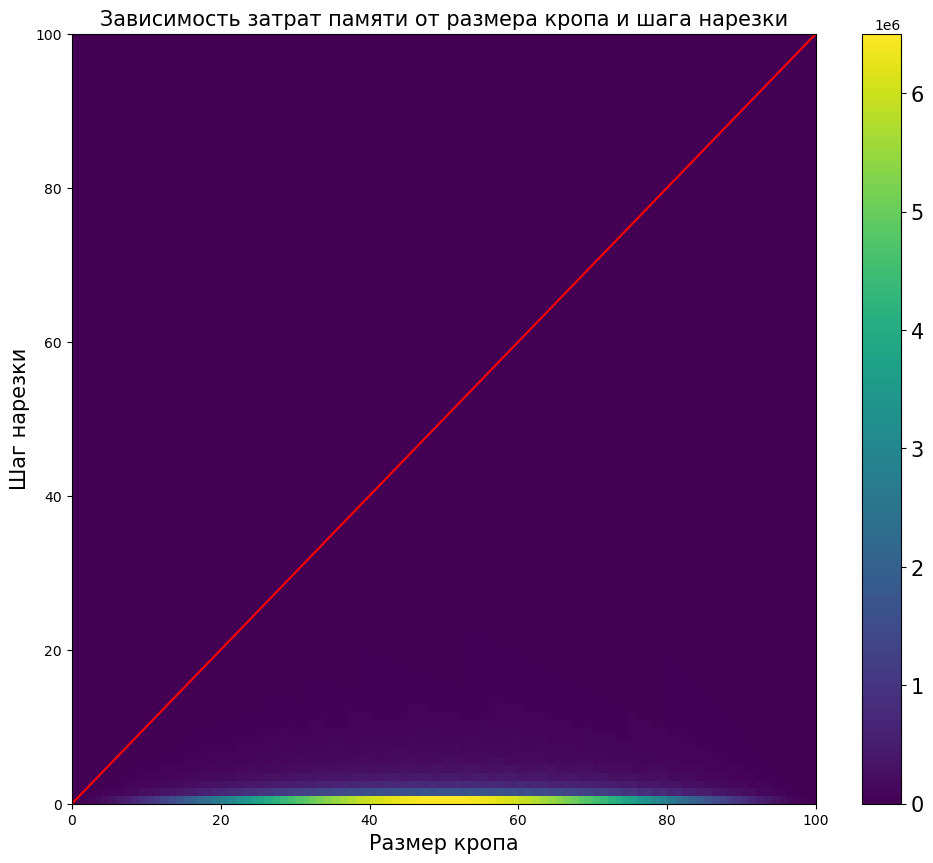

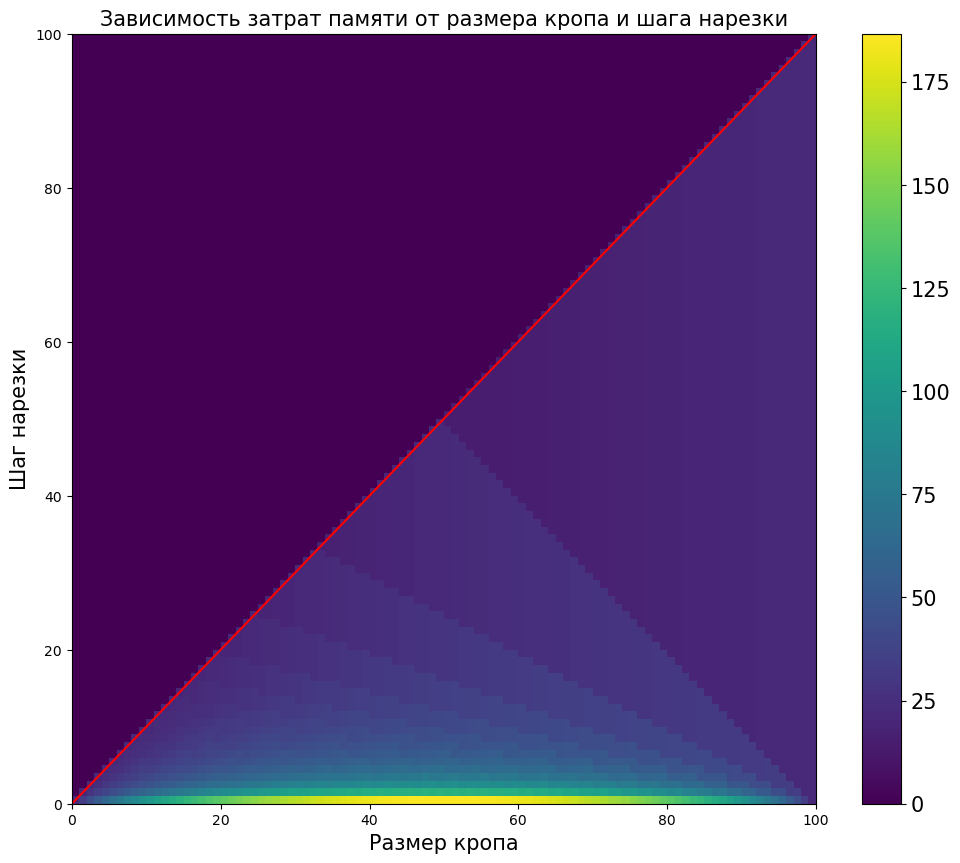

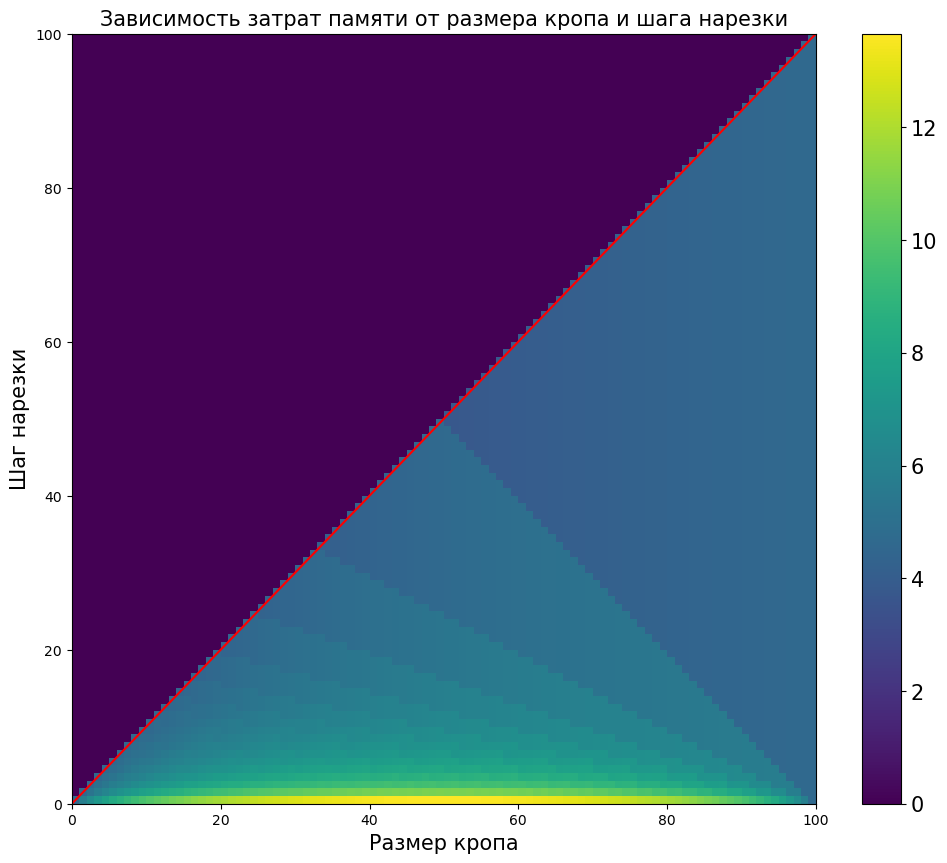

In [7]:
draw_map(mem_usage_array)
draw_map(np.cbrt(mem_usage_array))
draw_map(np.sqrt(np.cbrt(mem_usage_array)))

In [8]:
# delete all items where crop step bigger than crop size
# and normalize it
temp_arr = []
for i, row in enumerate(mem_usage_array):
    for j, item in enumerate(row):
        if i <= j:
            temp_arr.append(item)

temp_arr = np.array(temp_arr) 

'''def calc(arr, i):
    if i > 100000000:
        return
    summm = (temp_arr <= INIT_IMAGE_SIZE*i).sum()
    print(f'Кол-во наборов, где вес данных максимум в {i} раза больше начальных: {summm}')
    if summm == len(arr):
        return
    i = i*2
    calc(arr, i)

calc(temp_arr, 2)'''

max_val = temp_arr.max()

temp_arr = temp_arr / max_val

print(len(temp_arr))
print(len(temp_arr[temp_arr<=0.01]), f'{len(temp_arr[temp_arr<=0.01])/len(temp_arr):.4f}%')
print(temp_arr[temp_arr<=0.01].max() / (INIT_IMAGE_SIZE/max_val))

print(len(temp_arr))
print(len(temp_arr[temp_arr>0.01]), f'{len(temp_arr[temp_arr>0.01])/len(temp_arr):.4f}%')
print(temp_arr[temp_arr>0.01].max() / (INIT_IMAGE_SIZE/max_val))


5050
4359 0.8632%
6.5024999999999995
5050
691 0.1368%
650.25


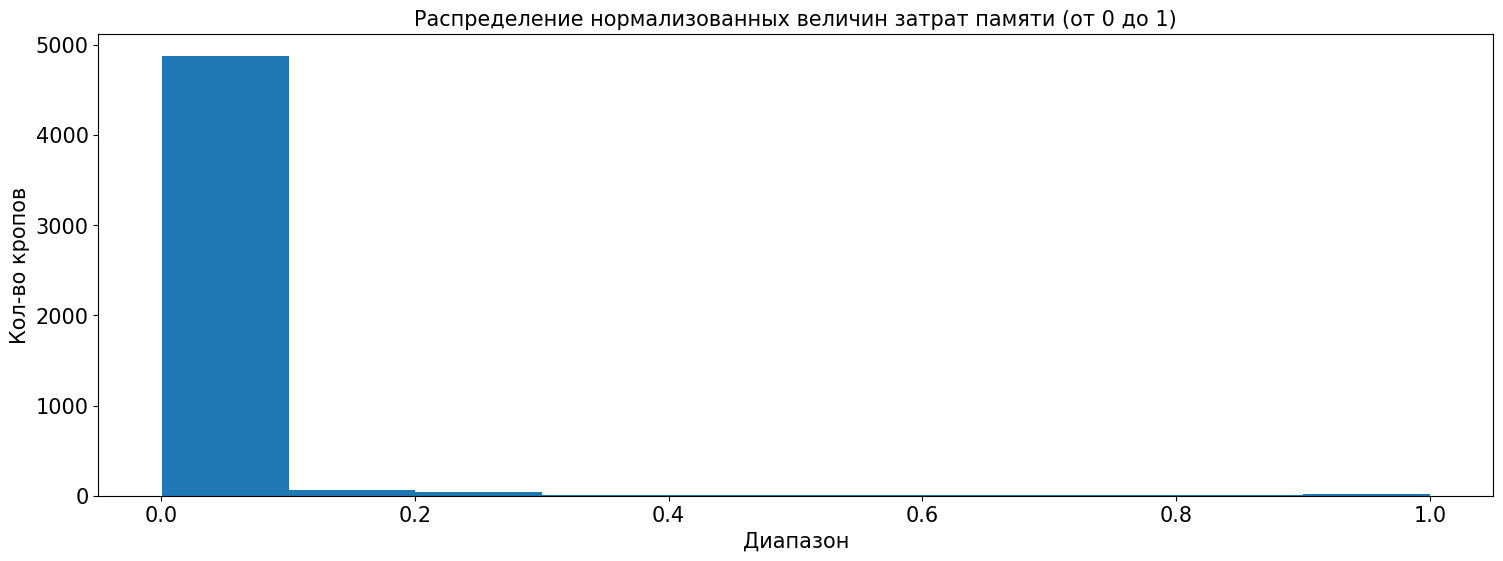

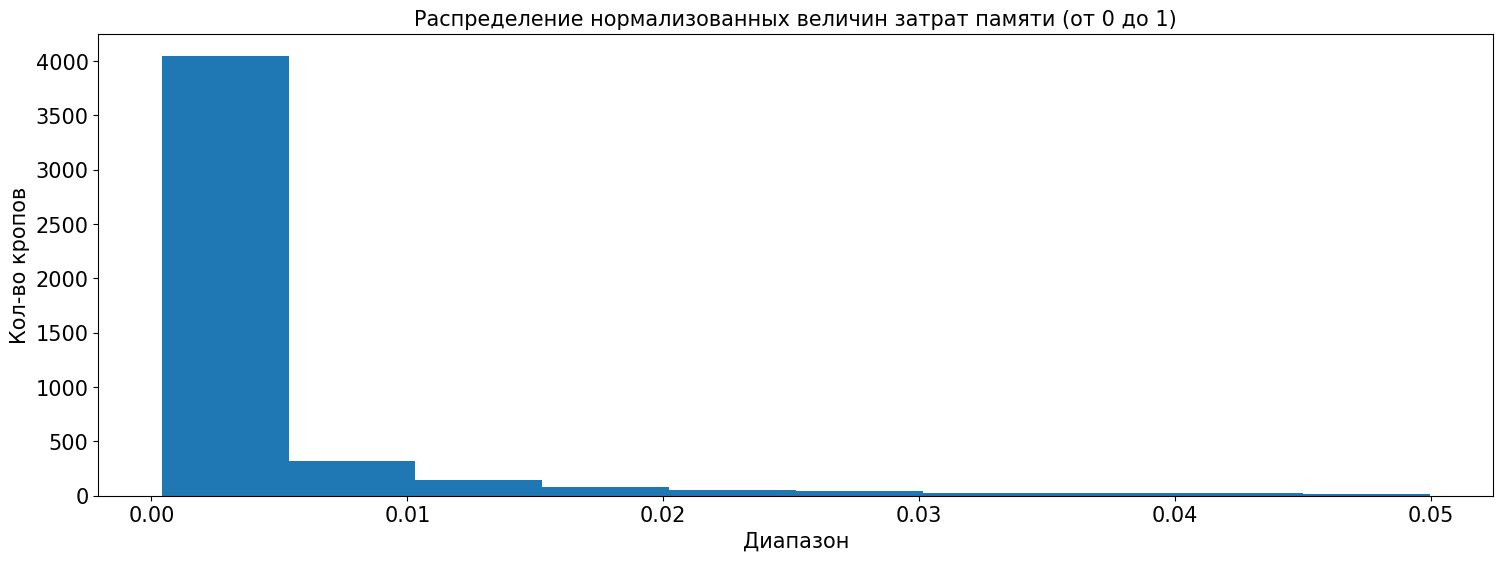

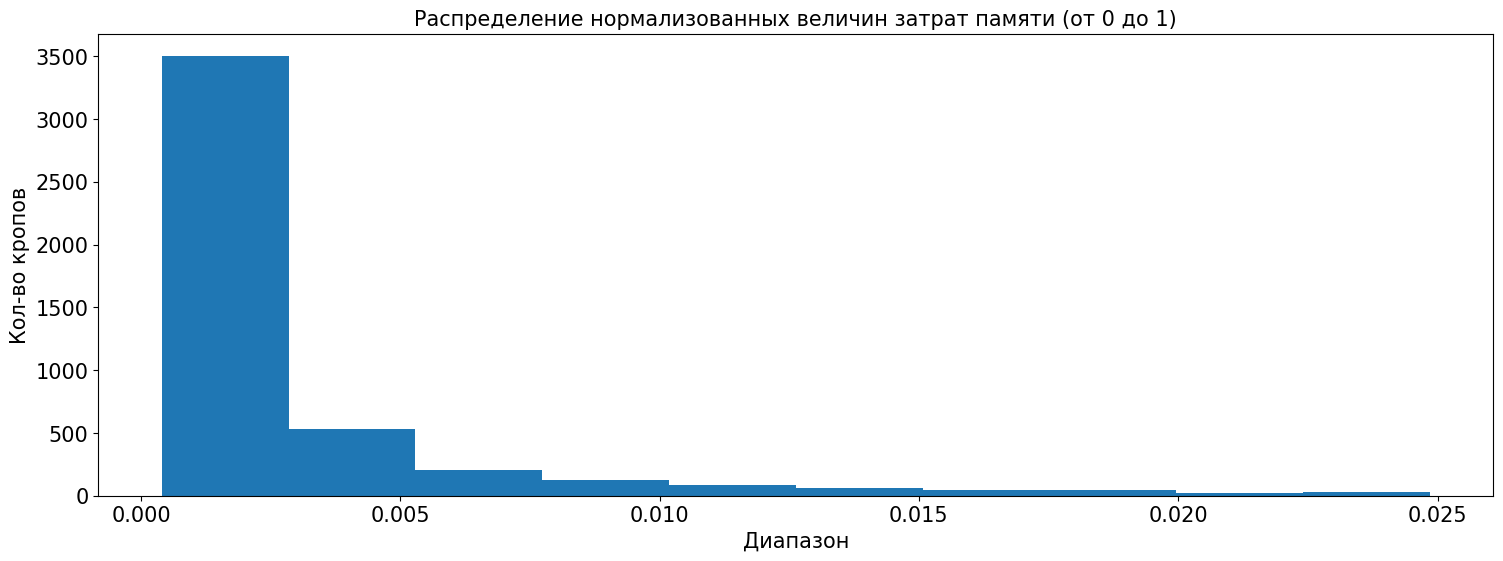

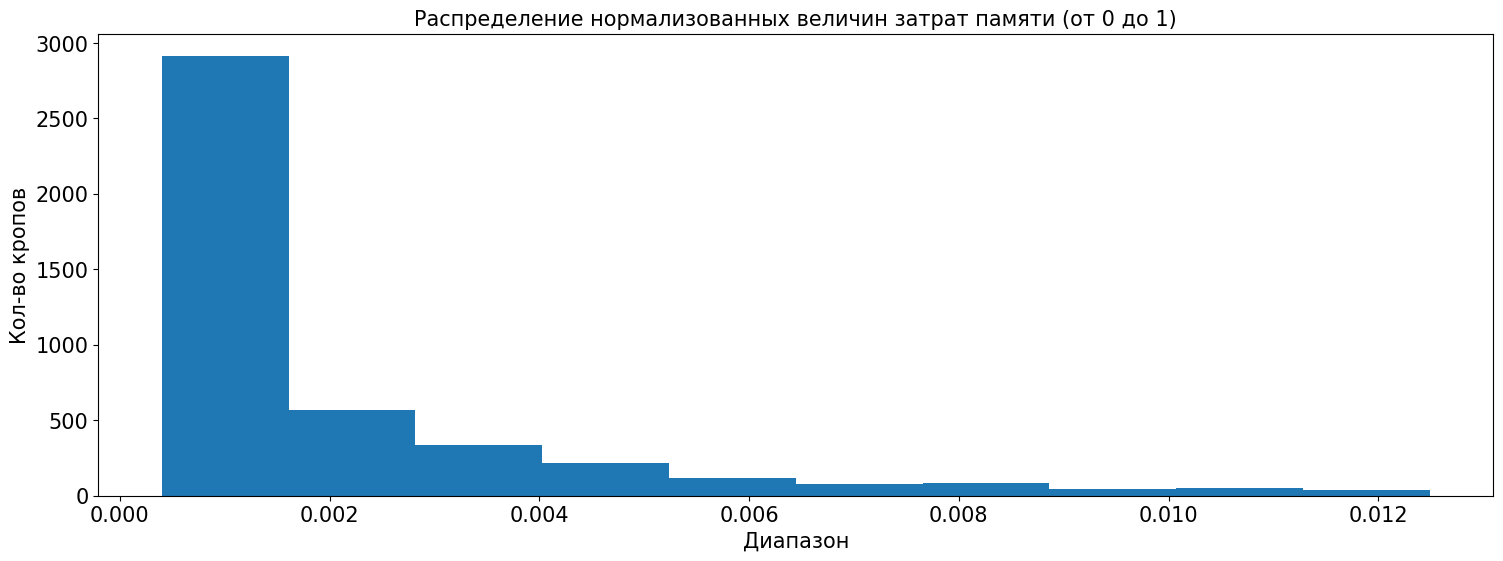

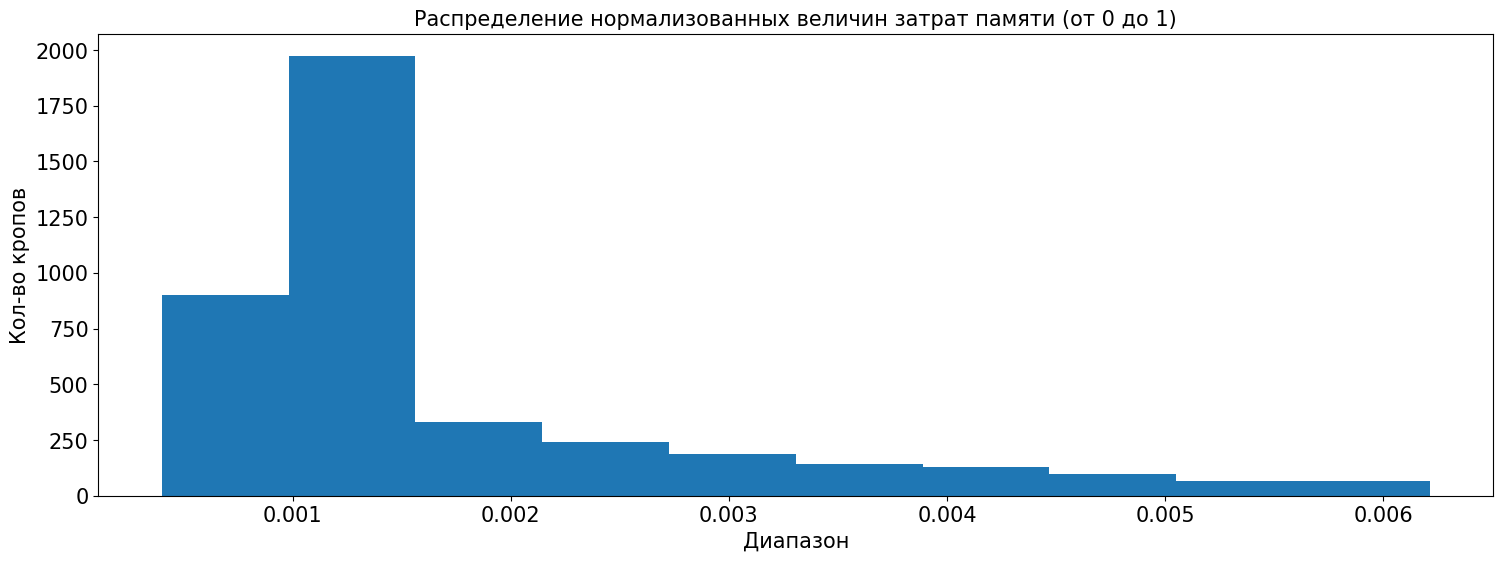

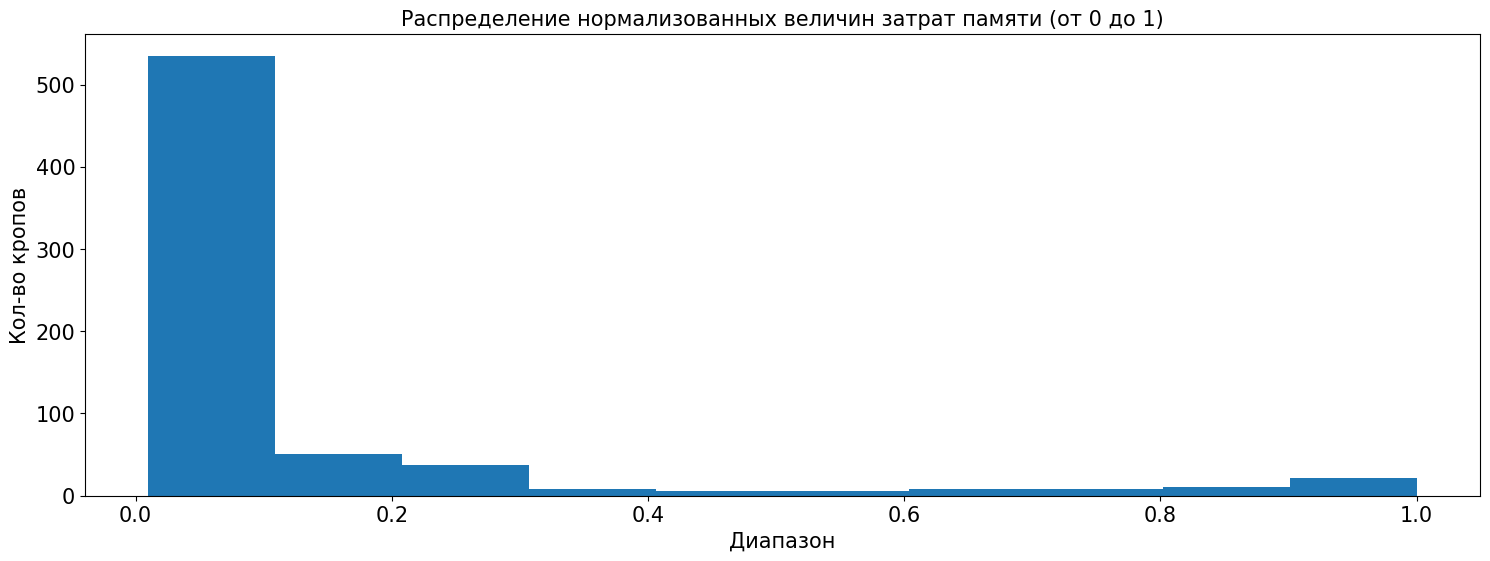

In [9]:
draw_hist(temp_arr)#,1/5, 1/20, '%.1f', '%.2f')
draw_hist(temp_arr[temp_arr<=0.05])#, 0.1/5, 0.1/20, '%.2f', '%.3f')
draw_hist(temp_arr[temp_arr<=0.025])#, 0.01/5, 0.01/20, '%.2f', '%.3f')
draw_hist(temp_arr[temp_arr<=0.0125])
draw_hist(temp_arr[temp_arr<=0.00625])
draw_hist(temp_arr[temp_arr>0.01])

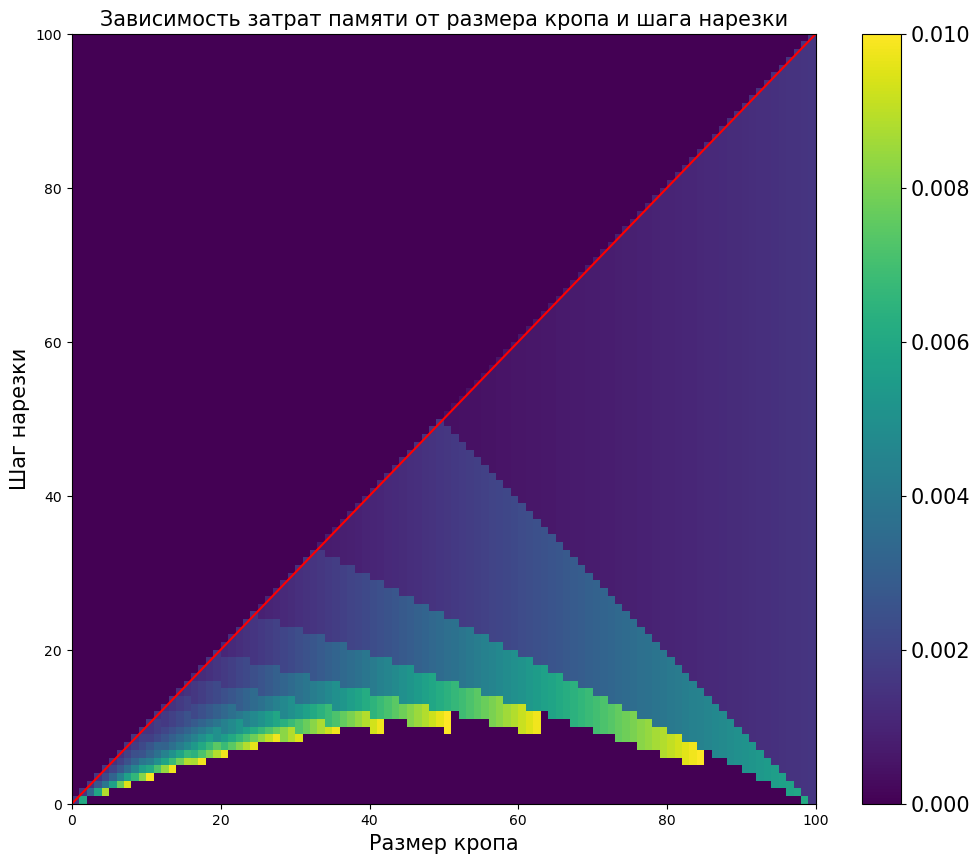

In [10]:
# прикинем где находятся соотношения, относящиеся к диапазону от 0 до 0.001
temp_map = np.zeros(mem_usage_array.shape)
for i in range(mem_usage_array.shape[0]):
    for j in range(mem_usage_array.shape[1]):
        temp = mem_usage_array[i,j] / mem_usage_array.max()
        if temp <= 0.01:
            temp_map[i,j] = temp

draw_map(temp_map)